In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

from scipy.stats import shapiro
from scipy.stats import anderson

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.mixture import BayesianGaussianMixture

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict


from sklearn import svm
# from imblearn.over_sampling import SMOTE, ADASYN
from sympy import diff, symbols, cos, sin





## Реализуем функции, мы их будем использовать в методах

### Функция Розенброка

In [2]:
def Rosenbrock(x):
    y = 0
    for i in range(x.shape[0]-1):
        y+=((1-x[i])**2)+100*((x[i+1]-(x[i]**2))**2)
    return y
        

### Функция Нестерова

In [3]:
def nesterov_func(x):
    y = 0.25*((x[0]-1)**2)
    for i in range(x.shape[0]-2):
        y+=(x[i+2]+1-2*(x[i+1])**2)**2
    return y

# Реализуем методы первого порядка

## Градиентный спуск

In [4]:
def grad_descent(f,grad,x0,eps=10**(-4),N = 10000,alpha = 1e-3):
    x_cur = np.asarray(x0)
    M = 0
    grads = []
    points = []
    values = []
    for i in range(N):
        points.append(x_cur)
        grad_cur = grad(x_cur)
        values.append(f(x_cur))
#         if np.linalg.norm(grad_cur) > 0.1:
#             grad_cur = 0.1*grad_cur/np.linalg.norm(grad_cur)
            
        grads.append(grad_cur)        
        x_new = x_cur - alpha*grad_cur
        M +=1
        
            
        if np.linalg.norm(grad(x_new))<eps:
            break
        x_cur = x_new
    
   
    return x_cur, M, grads, points,values
        

## Метод тяжелого шарика

In [5]:
 def heavy_ball(f,grad,x0,eps=10**(-4),N = 10000,alpha = 0.01,beta = 0.1):
        x_cur = np.asarray(x0)
        x_prev = np.asarray(x0)
        M = 0
        grads = []
        points = []
        for i in range(N):
            points.append(x_cur)
            grads.append(grad(x_cur))
            x_new = x_cur - alpha*grad(x_cur)+beta*(x_cur - x_prev)
            M+=1
            
            if np.linalg.norm(grad(x_new))<eps:   
                break
            x_prev = x_cur
            x_cur = x_new
        points.append(x_cur)
        return x_cur,M,grads, points



## Метод сопряженных градиентов

#### параметры $alpha$ и $beta$ находятся из задачи оптимизации

In [6]:
from scipy.optimize import minimize

In [7]:
def conj_grad(f,grad,x0,eps=10**(-4),N = 10000):
    x_cur = np.asarray(x0)
    x_prev = np.asarray(x0)
    M = 0
    grads = []
    points = []
    for i in range(N):
        points.append(x_cur)
        grads.append(grad(x_cur))
        g = (lambda params: f(x_cur-params[0]*grad(x_cur)+params[1]*(x_cur-x_prev)))
        res = minimize(g,np.zeros_like((1,1)))
        alpha = res.x[0]
        beta = res.x[1]
        x_new = x_cur - alpha*grad(x_cur)+beta*(x_cur - x_prev)
        M+=1
        
        if np.linalg.norm(grad(x_new))<eps:   
            break
        x_prev = x_cur
        x_cur = x_new
    points.append(x_cur)
    return x_cur,M,grads, points

            

In [8]:
import math

## Метод Нестерова

In [9]:
def nesterov_grad(f,grad,x0,eps=10**(-4),N = 10000,alpha = 0.0001):
    v_cur = np.asarray(x0)
    x_cur = np.asarray(x0)
    A_cur = 0
    M = 0
    grads = []
    points = []
    for i in range(N):
        points.append(x_cur)
        grads.append(grad(x_cur))
        a_new = alpha + math.sqrt(alpha*(alpha+2*A_cur))
        y_cur = (A_cur*x_cur+a_new*v_cur)/(A_cur+a_new)
        x_new = y_cur - alpha*grad(y_cur)
        v_new = v_cur - a_new*grad(x_new)
        A_new = A_cur+a_new
        M+=1
        
        if np.linalg.norm(grad(x_new))<eps:
            break
        v_cur = v_new
        x_cur = x_new
        A_cur = A_new
    points.append(x_cur)
    return x_cur, M,grads, points

In [10]:
from scipy.optimize import minimize_scalar

## Метод Adam

In [11]:
def adam(f,grad,x0,eps = 10**(-4),N=10000,alpha = 0.01, beta_1 = 0.9,beta_2 = 0.999,delta = 10**(-8)):
    x_cur = np.asarray(x0)
    m_t = np.zeros_like(x_cur)
    v_t = 0
    t = 0
    grads = []
    points = []
    for i in range(N):
        points.append(x_cur)
        grads.append(grad(x_cur))
        t+=1
        g_t = grad(x_cur)
        m_t = beta_1*m_t + (1-beta_1)*g_t
        v_t = beta_2*v_t + (1-beta_2)*(g_t@g_t)
        m_cap = m_t/(1-(beta_1**t))
        v_cap = v_t/(1-(beta_2**t))
        x_prev = x_cur
        x_cur = x_cur - (alpha*m_cap)/(math.sqrt(v_cap)+delta)
        
        if np.linalg.norm(grad(x_cur))<eps:
            break
    points.append(x_cur)
    return x_cur,t,grads, points
        

## Метод BFGS

In [12]:
def BFGS(f,grad,x0,eps = 10**(-4),N=10000):
    I = np.eye(np.asarray(x0).shape[0])
    H_cur = I
    x_cur = np.asarray(x0)
    M = 0
    grads = []
    points = []
    for i in range(N):
        points.append(x_cur)
        grads.append(grad(x_cur))
        M += 1
        p_cur = np.reshape(H_cur@grad(x_cur).T, -1)
        
        g = (lambda param:f(x_cur.T+param*p_cur))
        
        
        res = minimize_scalar(g)

        gamma = res.x
        x_new = x_cur+gamma*p_cur
        s_cur = x_new - x_cur
        y_cur = grad(x_new) - grad(x_cur)

        
        if np.linalg.norm(x_new-x_cur) < eps:
            break
        H_new = (I - (1/(np.dot(y_cur.T,s_cur)))*(np.matrix(s_cur).T@np.matrix(y_cur)))@H_cur@(I- (1/(np.dot(y_cur.T,s_cur)))*(np.matrix(y_cur).T@np.matrix(s_cur))) + (1/(np.dot(y_cur.T,s_cur)))*(np.matrix(s_cur).T@np.matrix(s_cur))
        x_cur = np.array(x_new)
        H_cur = np.array(H_new)

    points.append(x_cur)
    return x_cur, M, grads, points
        

# Тестовая функция и градиент

In [13]:
f1 = (lambda x:(x[0]+1)**2+2*(x[1]-1)**2)

In [14]:
def grad1(x):
    y = np.zeros_like(x)
    y[0] = 2*(x[0]+1)
    y[1] = 4*(x[1]-1)
    return y

# Градиенты функций Нестерова и Розенброка

In [15]:
def grad_rosenbrock(x):
    y = np.zeros_like(x)
    y[0] = -2*(1-x[0]) - 400*(x[1] - x[0]**2)*x[0]
    for i in range(1, x.shape[0] - 1):
        y[i] = -2*(1-x[i])+200*(x[i]-x[i-1]**2)-400*(-x[i]**2+x[i+1])*x[i]
    y[-1] = 200*(x[-1]-x[-2]**2)
    return y

In [16]:
def grad_nesterov(x):
    y = np.zeros_like(x)
    y[0] = 0.5*(x[0]-1) - 8*x[0]*(1 - 2*x[0]**2+x[1])
    for i in range(1, x.shape[0] - 1):
        y[i] = 2*(1-2*x[i-1]**2+x[i]) - 8*x[i]*(1-2*x[i]**2+x[i+1])
    y[-1] = 2*(1+x[-1]-2*x[-2]**2)
    
    
    return y

## Построим графики и количество итераций (зеленая точка - старт, красная - финиш)

# Градиентный спуск

In [38]:
x0 = np.array([-1,-1,1,1,1,1,1,1,1,1])
x1 = np.array([-1,1,1,1,1,1,1,1,1,1])

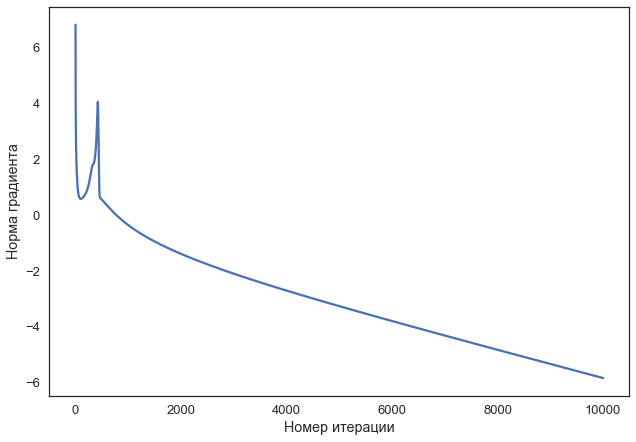

предельная точка: [0.99999029 0.99998055 0.99996101 0.99992183 0.99984328 0.99968581
 0.99937015 0.99873755 0.99747039 0.99493451]
количество итераций: 10000


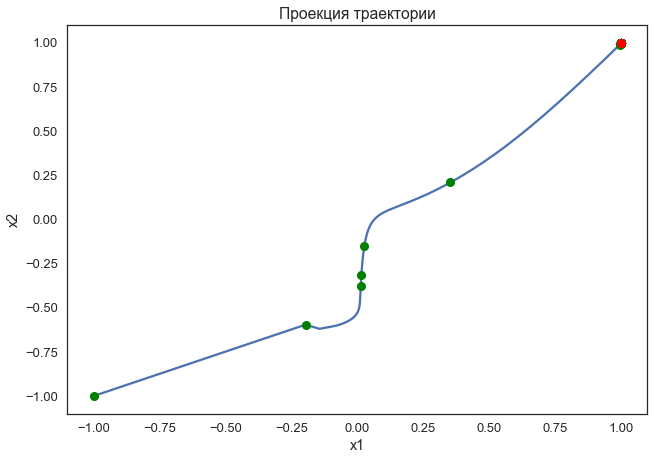

In [41]:
x, m, grads, points,values = grad_descent(alpha = 10**(-3),f = Rosenbrock, grad = grad_rosenbrock, x0 = x0)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Норма градиента')
plt.show()
points = np.array(points)

print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
for i in range(99):
    plt.plot(points[i*100+1,0], points[i*100+1,1], 'go')
plt.plot(points[m-1,0], points[m-1,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()



# Метод тяжелого шарика

In [200]:
x0 = [-1,-1,1,1,1,1,1,1,1,1]
beta = 0.8
N = 10000

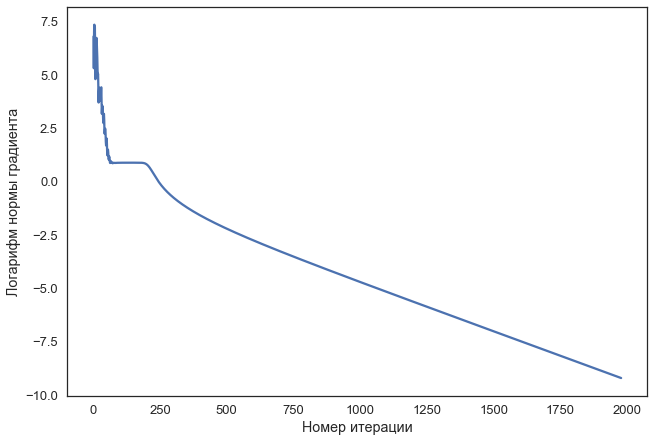

предельная точка: [0.99999967 0.99999933 0.99999867 0.99999732 0.99999464 0.99998925
 0.99997844 0.99995677 0.99991332 0.99982621]
количество итераций: 1978


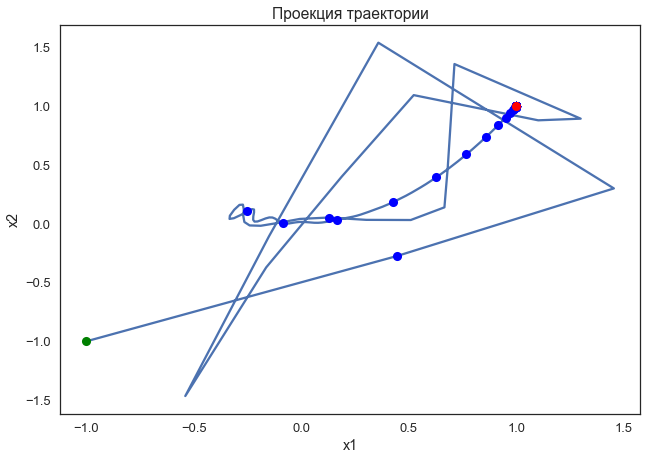

In [201]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0018,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
for i in range(100):
    plt.plot(points[i*15+1,0], points[i*15+1,1], 'bo')
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()



In [202]:
x0=[-1,-1,1,1,1,1,1,1,1,1]
beta = 0.8
N = 500
new_points = []


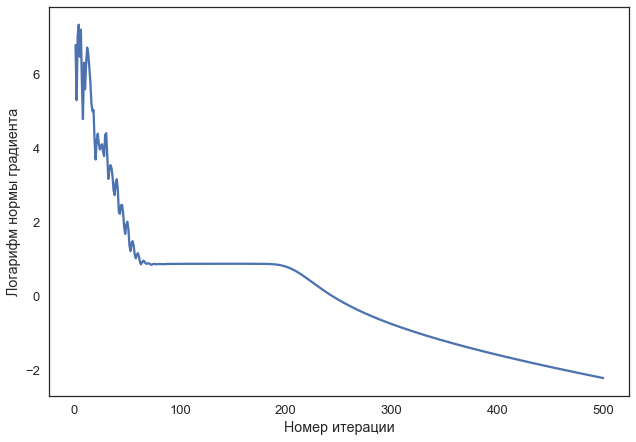

предельная точка: [0.99965028 0.99929946 0.99859635 0.99718822 0.99437126 0.9887478
 0.97756899 0.95553332 0.91282332 0.83278559]
количество итераций: 500


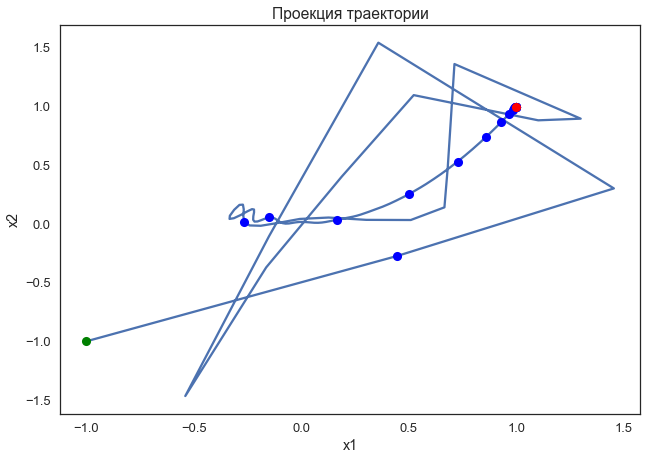

In [203]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0018,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])

for i in range(25):
    plt.plot(points[i*20+1,0], points[i*20+1,1], 'bo')
plt.plot(points[m-1,0], points[m-1,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [204]:
all_points.append(points)

In [205]:
x0 = x

In [206]:
beta = 0.8
N = 500

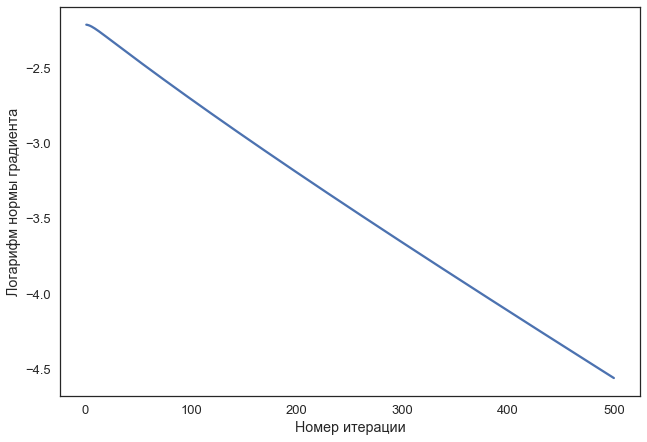

предельная точка: [0.99996541 0.99993069 0.99986106 0.99972147 0.99944163 0.9988808
 0.99775728 0.99550842 0.99101456 0.98206467]
количество итераций: 500


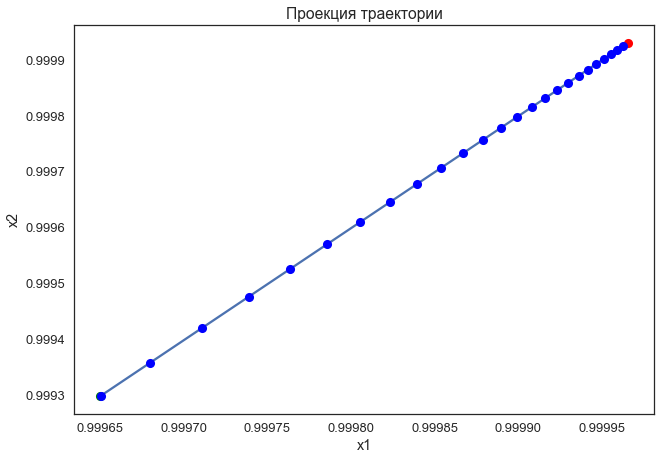

In [207]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0017,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(25):
    plt.plot(points[i*20+1,0], points[i*20+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

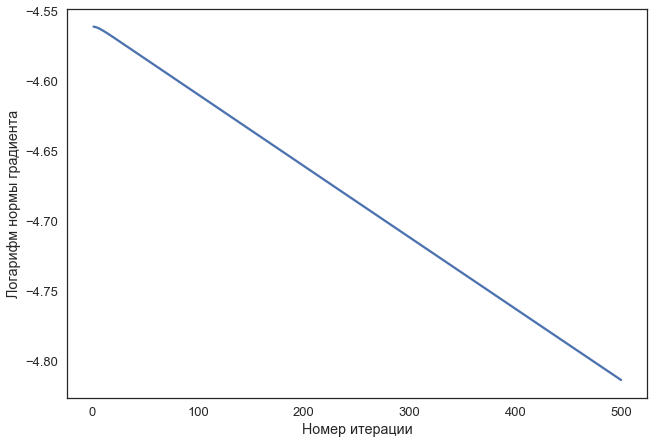

предельная точка: [0.99997312 0.99994614 0.99989203 0.99978355 0.99956607 0.99913017
 0.99825677 0.99650789 0.99301051 0.98603477]
количество итераций: 500


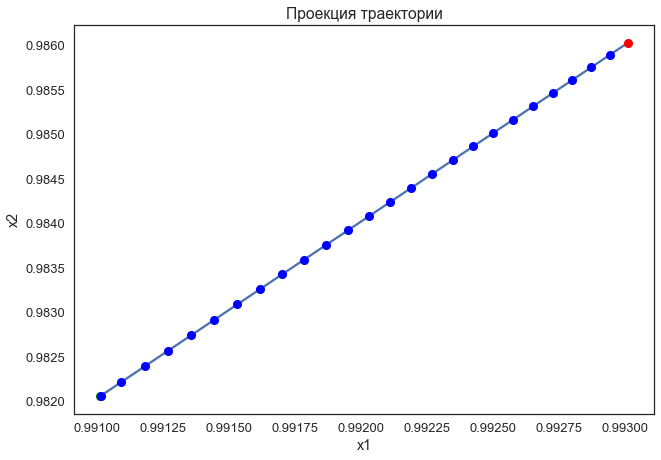

In [208]:
all_points.append(points)
x0 = x
beta = 0.8
N = 500
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0002,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,8], points[:,9])
plt.plot(points[m,8], points[m,9], 'ro')
plt.plot(points[0,8], points[0,9], 'go')
for i in range(25):
    plt.plot(points[i*20+1,8], points[i*20+1,9], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

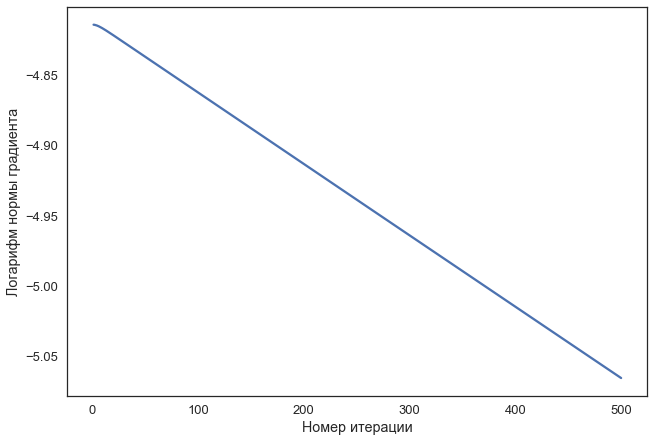

предельная точка: [0.99997909 0.99995811 0.99991602 0.99983163 0.99966246 0.99932336
 0.9986438  0.99728267 0.99455913 0.98912057]
количество итераций: 500


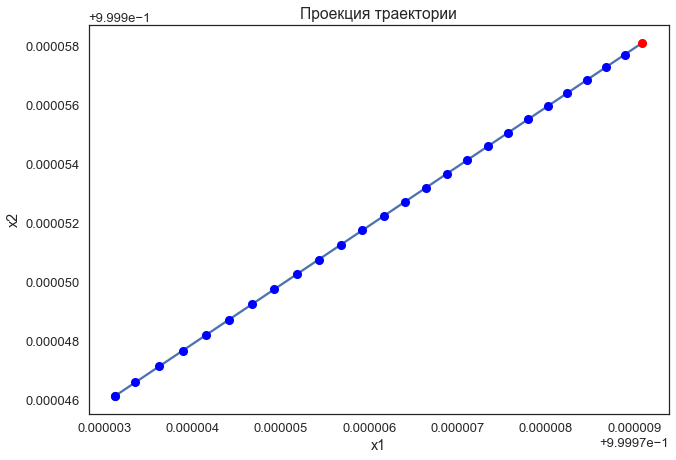

In [209]:
all_points.append(points)
x0 = x
beta = 0.8
N = 500
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0002,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(25):
    plt.plot(points[i*20+1,0], points[i*20+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

# Сопряженные градиенты

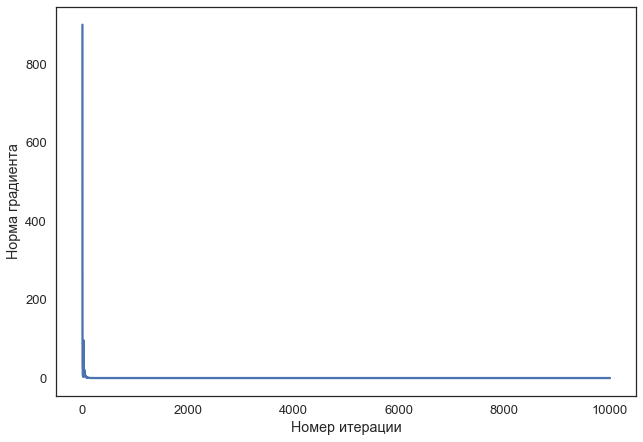

предельная точка: [0.99999078 0.99998127 0.99996294 0.99992503 0.99985049 0.99969942
 0.99939821 0.99879311 0.99758213 0.99515774]
количество итераций: 10000


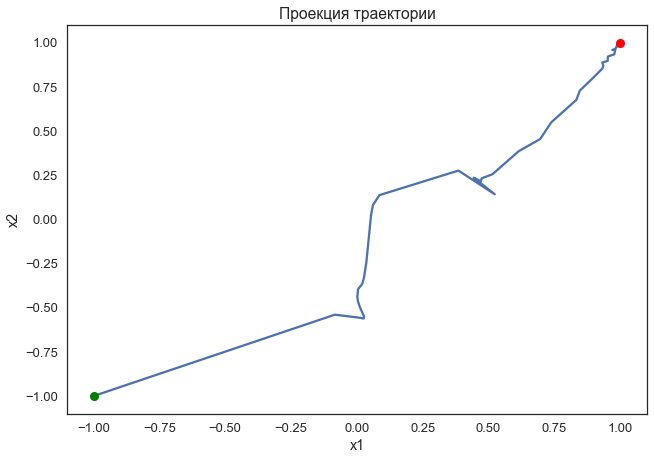

In [20]:
x, m, grads, points = conj_grad(Rosenbrock,grad_rosenbrock,x0 = x0)
plt.plot(np.linspace(1, m, m), np.sqrt(np.sum(np.array(grads)**2, axis = 1)))
plt.xlabel('Номер итерации')
plt.ylabel('Норма градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m-1,0], points[m-1,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

# Метод Нестерова

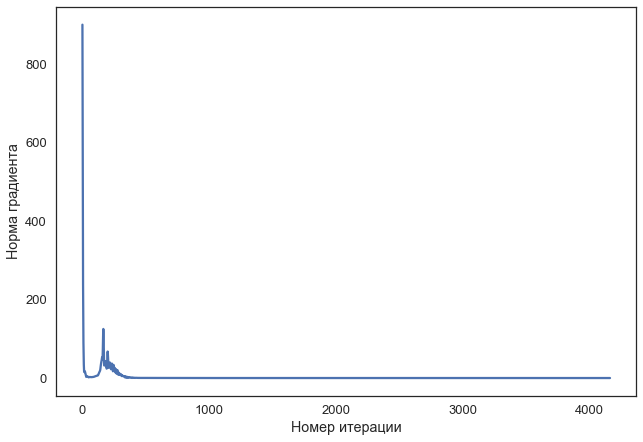

предельная точка: [0.99999966 0.99999932 0.99999864 0.99999726 0.9999945  0.99998896
 0.99997781 0.99995543 0.9999105  0.99982037]
количество итераций: 4163


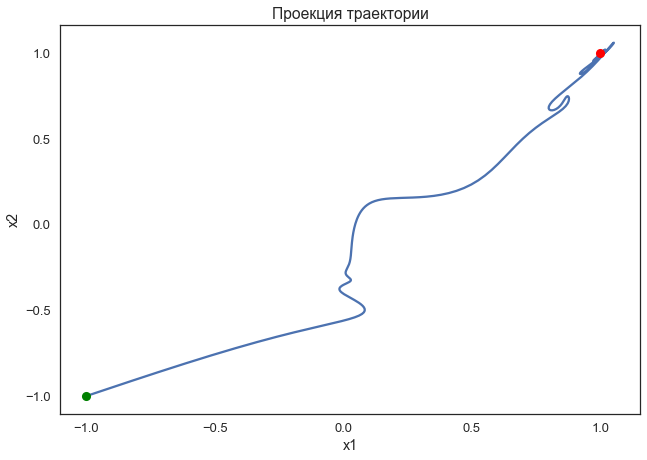

In [21]:
x, m, grads, points = nesterov_grad(Rosenbrock,grad_rosenbrock,x0 = x0)
plt.plot(np.linspace(1, m, m), np.sqrt(np.sum(np.array(grads)**2, axis = 1)))
plt.xlabel('Номер итерации')
plt.ylabel('Норма градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m-1,0], points[m-1,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

# BFGS

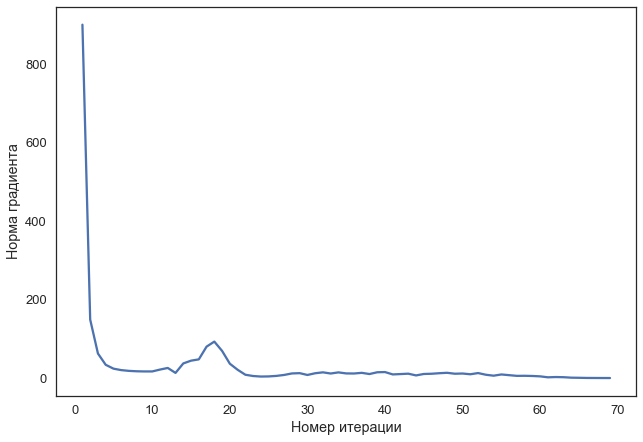

предельная точка: [0.99999363 0.99999437 1.00000086 1.00000002 0.99999878 0.999996
 0.99999286 0.99998352 0.99996441 0.99992106]
количество итераций: 69


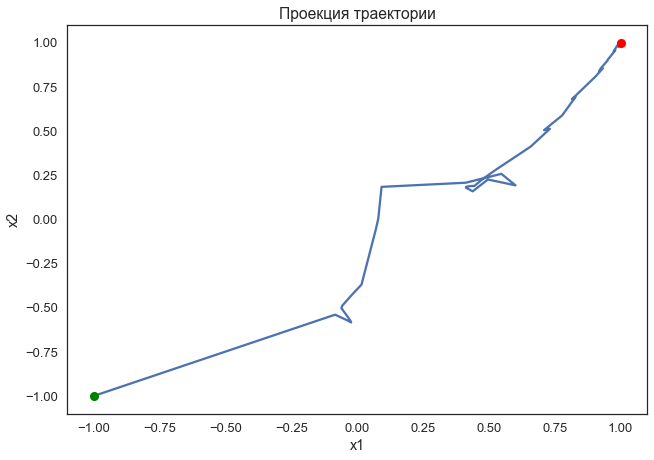

In [22]:
x, m, grads, points = BFGS(Rosenbrock,grad_rosenbrock,[-1,-1,1,1,1,1,1,1,1,1])
plt.plot(np.linspace(1, m, m), np.sqrt(np.sum(np.array(grads)**2, axis = 1)))
plt.xlabel('Номер итерации')
plt.ylabel('Норма градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m-1,0], points[m-1,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

# Адам метод

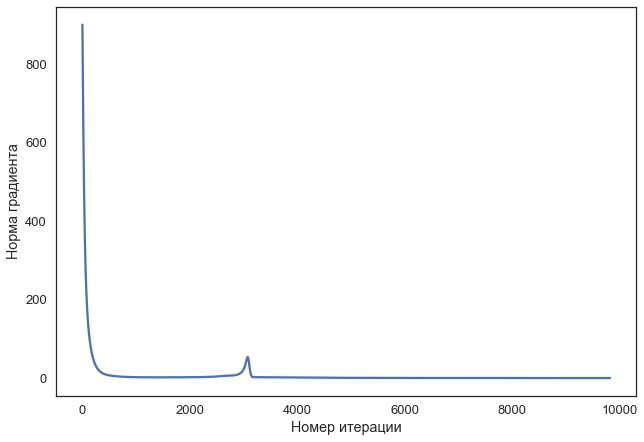

предельная точка: [0.99999967 0.99999934 0.99999867 0.99999733 0.99999465 0.99998928
 0.9999785  0.99995689 0.99991356 0.9998267 ]
количество итераций: 9827


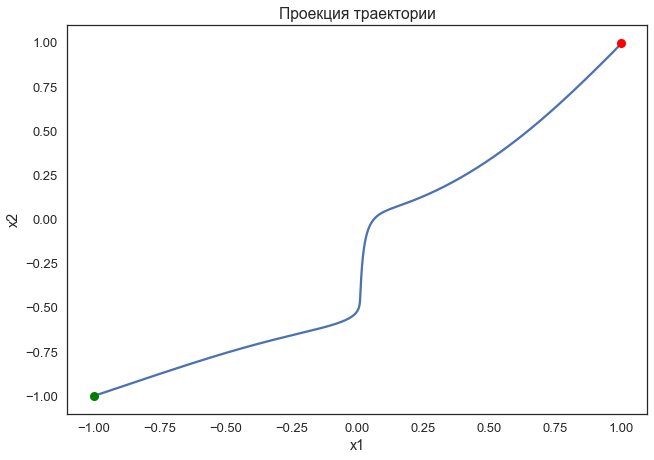

In [23]:
x, m, grads, points = adam(Rosenbrock,grad_rosenbrock,[-1,-1,1,1,1,1,1,1,1,1])
plt.plot(np.linspace(1, m, m), np.sqrt(np.sum(np.array(grads)**2, axis = 1)))
plt.xlabel('Номер итерации')
plt.ylabel('Норма градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m-1,0], points[m-1,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()